In [1]:
# Data Handling and Manipulation 
import pandas as pd  
import numpy as np  
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns  
from wordcloud import WordCloud  
# NLP
import spacy  # For advanced natural language processing tasks, including tokenization, parsing, and named entity recognition
from textblob import TextBlob  # For simple NLP tasks like sentiment analysis and text processing
# Importing Utility 
from collections import Counter  # For counting hashable objects, particularly useful for counting word frequencies

In [2]:
df=pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/processed_reviews_second.csv')
df.head()

,listing_id,id,date,reviewer_id,comments,Year,Lang,host_name,neighbourhood_cleansed,room_type,...,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Number of Sentences,Number of Words,Number of Characters,Host,Host freq
0,15420,755523548,2021-06-05,187504576,fantastic apartment beautifully furnish throug...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,3,50,324,False,0
1,15420,761386255,2021-05-23,119596131,"amaze place . justice ! spotlessly clean , hug...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,6,54,332,True,2
2,15420,770467244,2021-06-14,111721539,book apartment surprise birthday visit host to...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,6,78,450,True,3
3,15420,396926559045081909,2021-01-07,41684971,"stayed place many time . comfortable , clean p...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,3,33,206,True,2
4,15420,398989660111676009,2021-04-07,357578834,fabulous apartment brilliant location thoughtf...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,2,19,112,True,1


In [3]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')

In [4]:
# Function to extract and refine noun phrases (aspects) from text
def extract_aspects(text):
    # Handle non-string entries
    if not isinstance(text, str):
        return []
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract noun phrases and filter them
    aspects = []
    for chunk in doc.noun_chunks:
        # Filter out single-word aspects that are too general or unhelpful
        if len(chunk.text.split()) > 1 and chunk.text.lower() not in ["everything", "anything"]:
            aspects.append(chunk.text.lower())

In [15]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract and refine noun phrases (aspects) from text
def extract_aspects(text):
    # Handle non-string entries
    if not isinstance(text, str):
        return []
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract noun phrases and filter them
    aspects = []
    for chunk in doc.noun_chunks:
        aspect = chunk.text.lower()
        # Filtering conditions
        if "host" in aspect and len(aspect.split()) == 2:  # specifically remove phrases like "home host"
            continue
        if aspect in ["everything", "anything", "home host", "thanks host", "apartment host", "host host"]:
            continue
        if len(aspect.split()) > 1:
            aspects.append(aspect)
    
    return aspects

# Apply the aspect extraction function to each comment
df['aspects'] = df['comments'].apply(extract_aspects)

# Flatten the list of aspects and count their frequencies
all_aspects = [aspect for sublist in df['aspects'].tolist() for aspect in sublist]
aspect_freq = Counter(all_aspects)

# Display the most common aspects
most_common_aspects = aspect_freq.most_common(20)
for aspect, freq in most_common_aspects:
    print(f"Aspect: {aspect}, Frequency: {freq}")

Aspect: great location, Frequency: 8217
Aspect: great place, Frequency: 3766
Aspect: walk distance, Frequency: 3278
Aspect: lovely apartment, Frequency: 2230
Aspect: perfect location, Frequency: 1906
Aspect: great apartment, Frequency: 1741
Aspect: royal mile, Frequency: 1681
Aspect: lovely place, Frequency: 1453
Aspect: host great host, Frequency: 1403
Aspect: good location, Frequency: 1341
Aspect: old town, Frequency: 1044
Aspect: excellent location, Frequency: 1036
Aspect: beautiful apartment, Frequency: 1005
Aspect: fantastic location, Frequency: 932
Aspect: comfortable bed, Frequency: 895
Aspect: great communication, Frequency: 787
Aspect: host wonderful host, Frequency: 767
Aspect: perfect place, Frequency: 704
Aspect: nice place, Frequency: 703
Aspect: wonderful place, Frequency: 615


In [8]:
# Displaying more aspects
most_common_aspects = aspect_freq.most_common(50)
for aspect, freq in most_common_aspects:
    print(f"Aspect: {aspect}, Frequency: {freq}")

Aspect: great location, Frequency: 8217
Aspect: great place, Frequency: 3766
Aspect: walk distance, Frequency: 3278
Aspect: great host, Frequency: 3087
Aspect: lovely apartment, Frequency: 2230
Aspect: perfect location, Frequency: 1906
Aspect: great apartment, Frequency: 1741
Aspect: royal mile, Frequency: 1681
Aspect: lovely place, Frequency: 1453
Aspect: host great host, Frequency: 1403
Aspect: host host, Frequency: 1352
Aspect: good location, Frequency: 1341
Aspect: thanks host, Frequency: 1195
Aspect: old town, Frequency: 1044
Aspect: excellent location, Frequency: 1036
Aspect: beautiful apartment, Frequency: 1005
Aspect: fantastic location, Frequency: 932
Aspect: comfortable bed, Frequency: 895
Aspect: communication host, Frequency: 799
Aspect: great communication, Frequency: 787
Aspect: host wonderful host, Frequency: 767
Aspect: host apartment, Frequency: 746
Aspect: host kind, Frequency: 736
Aspect: perfect place, Frequency: 704
Aspect: nice place, Frequency: 703
Aspect: wonder

In [17]:
# Dropping rows where the 'comments' column is empty if any
df = df.dropna(subset=['comments'])

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis to each review
df['sentiment'] = df['comments'].apply(get_sentiment)

In [18]:
# Filtering aspects based on the frequency threshold of 8
filtered_aspects = [aspect for aspect, freq in aspect_freq.items() if freq >= 8]

In [19]:
# Dictionary to store the average sentiment for each filtered aspect
aspect_sentiment = {}

# Calculating the average sentiment for each filtered aspect
for aspect in filtered_aspects:
    # Finding all reviews that mention this aspect
    relevant_reviews = df[df['aspects'].apply(lambda x: aspect in x)]
    # Calculating the mean sentiment for these reviews
    aspect_sentiment[aspect] = relevant_reviews['sentiment'].mean()

# Converting the dictionary to a dataframe for easier analysis
aspect_sentiment_df = pd.DataFrame(list(aspect_sentiment.items()), columns=['Aspect', 'Average Sentiment'])

# Sorting the DataFrame by sentiment score
aspect_sentiment_df = aspect_sentiment_df.sort_values(by='Average Sentiment', ascending=False)

# Displaying the results
print("Top 10 Aspects with Positive Sentiment:")
print(aspect_sentiment_df.head(10))  # For positive aspects

print("\nTop 10 Aspects with Negative Sentiment:")
print(aspect_sentiment_df.tail(10))  # For negative aspects

Top 10 Aspects with Positive Sentiment:
                                    Aspect  Average Sentiment
2595  wonderful apartment perfect location           0.712536
4364              great brilliant location           0.657271
437                  perfect communication           0.648907
3458  excellent apartment perfect location           0.641592
3100             absolutely perfect family           0.629613
490     wonderful apartment great location           0.629199
3112         great property great location           0.625110
3596             absolutely beautiful home           0.621819
1862              host wonderful apartment           0.613804
3614            great apartment great host           0.613150

Top 10 Aspects with Negative Sentiment:
                   Aspect  Average Sentiment
3425       one bath towel           0.102115
3711        entrance hall           0.092194
796        partial refund           0.086289
2294         poor quality           0.085219
4444        

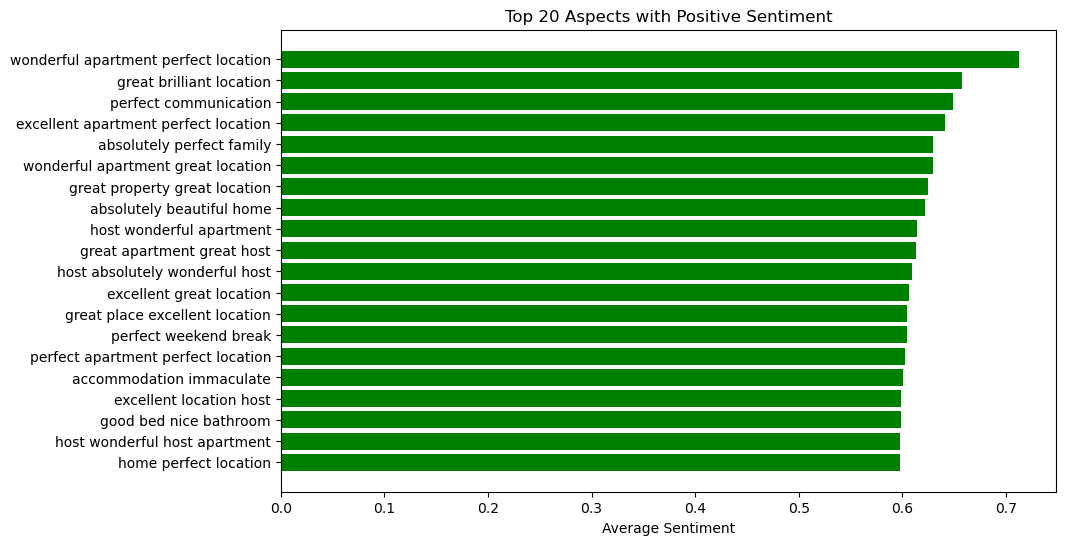

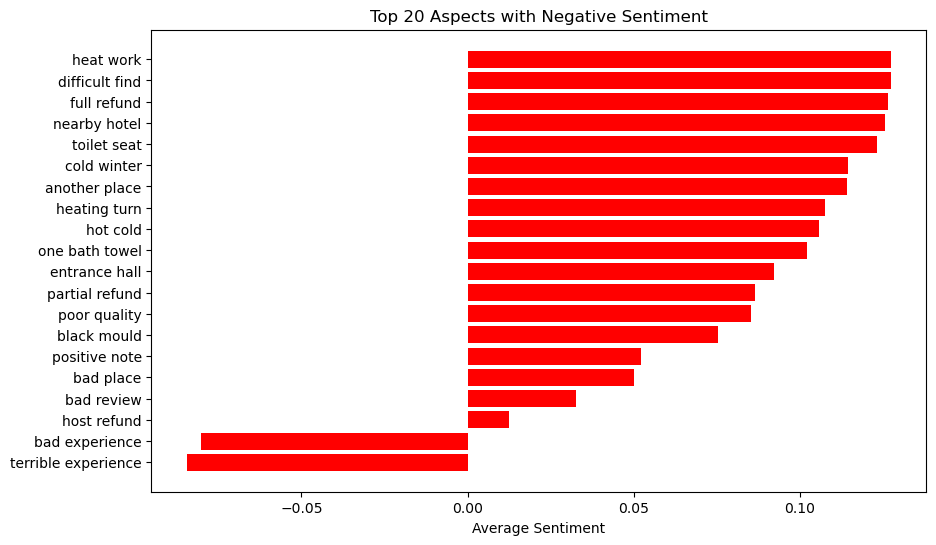

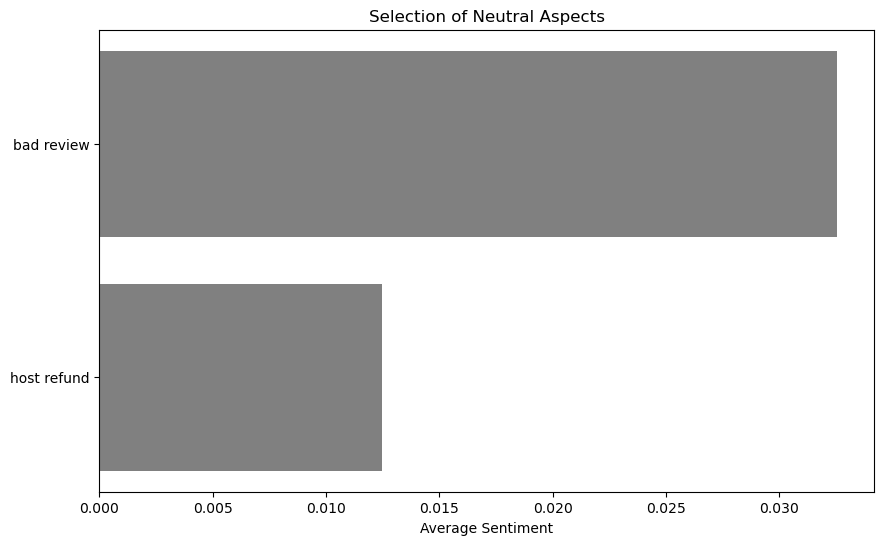

In [13]:
# Visualize the Top 10 Positive Sentiment Aspects
plt.figure(figsize=(10, 6))
plt.barh(aspect_sentiment_df['Aspect'].head(20), aspect_sentiment_df['Average Sentiment'].head(20), color='green')
plt.xlabel('Average Sentiment')
plt.title('Top 20 Aspects with Positive Sentiment')
plt.gca().invert_yaxis()  # Highest sentiment at the top
plt.show()

# Visualize the Top 10 Negative Sentiment Aspects
plt.figure(figsize=(10, 6))
plt.barh(aspect_sentiment_df['Aspect'].tail(20), aspect_sentiment_df['Average Sentiment'].tail(20), color='red')
plt.xlabel('Average Sentiment')
plt.title('Top 20 Aspects with Negative Sentiment')
plt.gca().invert_yaxis()  # Most negative sentiment at the top
plt.show()

# Visualize a Selection of Neutral Sentiment Aspects
# Neutral aspects are those with sentiment close to 0, so we filter them
neutral_threshold = 0.05  # You can adjust this threshold
neutral_aspects = aspect_sentiment_df[
    (aspect_sentiment_df['Average Sentiment'] > -neutral_threshold) & 
    (aspect_sentiment_df['Average Sentiment'] < neutral_threshold)
].head(10)

plt.figure(figsize=(10, 6))
plt.barh(neutral_aspects['Aspect'], neutral_aspects['Average Sentiment'], color='gray')
plt.xlabel('Average Sentiment')
plt.title('Selection of Neutral Aspects')
plt.gca().invert_yaxis()  # Neutral aspects at the top
plt.show()

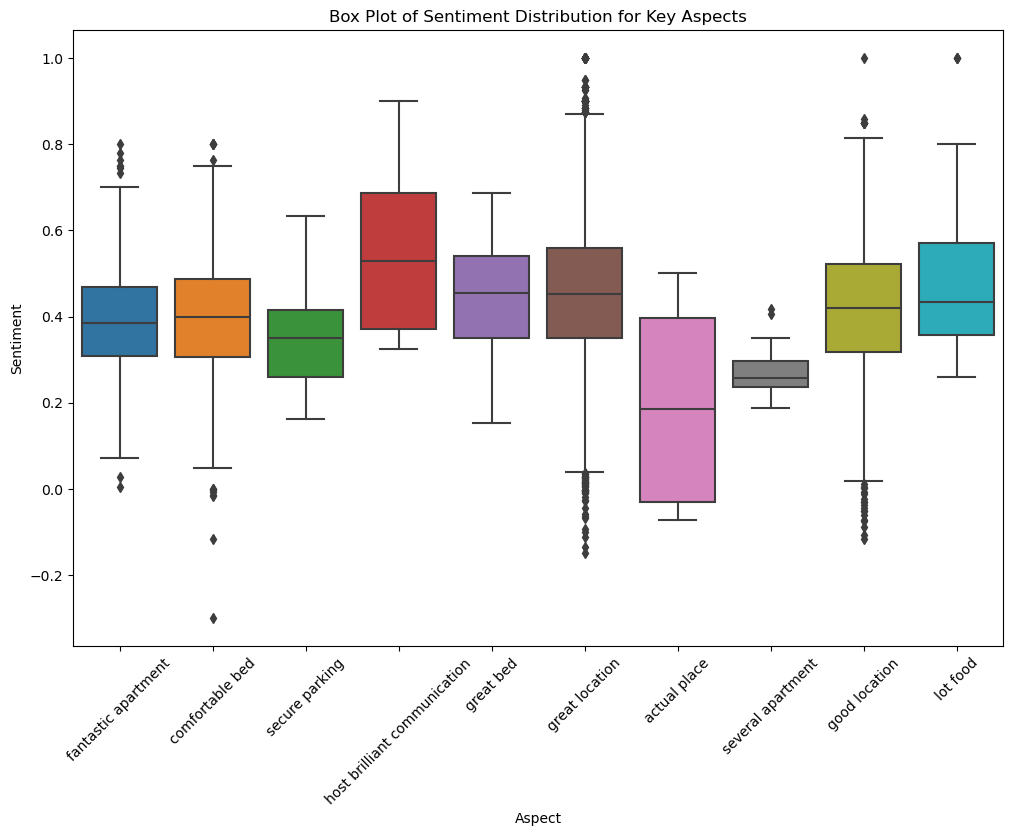

In [20]:
# Preparing data for box plot
boxplot_data = []
for aspect in filtered_aspects:
    aspect_data = df[df['aspects'].apply(lambda x: aspect in x)]['sentiment']
    boxplot_data.append(aspect_data)

# Plot the box plot for top 10 most frequent aspects. A box plot shows the distribution of sentiment scores for the top aspects, giving insights into the variability in sentiment.
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data[:10])
plt.xticks(ticks=range(10), labels=filtered_aspects[:10], rotation=45)
plt.xlabel('Aspect')
plt.ylabel('Sentiment')
plt.title('Box Plot of Sentiment Distribution for Key Aspects')
plt.show()

In [21]:
df

,listing_id,id,date,reviewer_id,comments,Year,Lang,host_name,neighbourhood_cleansed,room_type,...,reviews_per_month,calculated_host_listings_count,availability_365,Number of Sentences,Number of Words,Number of Characters,Host,Host freq,aspects,sentiment
0,15420,755523548,2021-06-05,187504576,fantastic apartment beautifully furnish throug...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3.4,1,58,3,50,324,False,0,"[fantastic apartment, comfortable bed, great b...",0.454762
1,15420,761386255,2021-05-23,119596131,"amaze place . justice ! spotlessly clean , hug...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3.4,1,58,6,54,332,True,2,"[spotlessly clean , huge yet cozy living room ...",0.325000
2,15420,770467244,2021-06-14,111721539,book apartment surprise birthday visit host to...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3.4,1,58,6,78,450,True,3,"[book apartment surprise birthday visit host, ...",0.355000
3,15420,396926559045081909,2021-01-07,41684971,"stayed place many time . comfortable , clean p...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3.4,1,58,3,33,206,True,2,"[comfortable , clean perfect location, bonus t...",0.577778
4,15420,398989660111676009,2021-04-07,357578834,fabulous apartment brilliant location thoughtf...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3.4,1,58,2,19,112,True,1,[fabulous apartment brilliant location thought...,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167562,1099245562738502645,1112274193732420737,2024-03-14,184378916,"great location really handy get town , apartme...",2024,en,host_275,Deans Village,Entire home/apt,...,2.0,1,95,4,35,208,True,1,"[great location really handy get town, would d...",0.505556
167563,1104483554649248844,1107245035486025983,2024-07-03,201633202,"great host , quick every question concerned am...",2024,en,host_222,Deans Village,Entire home/apt,...,3.0,12,95,2,17,112,True,1,"[great host , quick every question concerned a...",0.525000
167564,1104483554649248844,1114479730764289537,2024-03-17,27525649,can not recommend apartment enough . absolutel...,2024,en,host_222,Deans Village,Entire home/apt,...,3.0,12,95,3,28,183,True,1,[absolutely gorgeous apartment smack bang],0.360000
167565,1106309197963852421,1111502232312727722,2024-03-13,483439174,spacious cozy apartment two affordable price ....,2024,en,host_500,Canonmills and New Town North,Entire home/apt,...,1.0,117,307,3,31,182,False,0,"[spacious cozy apartment, two affordable price...",0.168750
